## 2.2 What is Algorithm Analysis?

In [32]:
import time
import timeit
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def sumofN(n) :
    thesum = 0
    for i in range(1, n + 1) :
        thesum = thesum + i
    return thesum

In [3]:
print(sumofN(10))

55


In [4]:
def foo(tom) :
    fred = 0
    for bill in range(1,tom + 1) :
        barney = bill
        fred = fred + barney

    return fred

In [5]:
print(foo(10))

55


##### 두 코드가 같은 기능을 하는 코드이지만, 변수명을 직관적으로 사용하느냐에 따라 로직을 이해하는 데에 큰 차이가 있다.

In [6]:
def sumofN2(n) :
    start_time = time.time()
    thesum = 0
    for i in range(1, n + 1) :
        thesum = thesum + i
    
    end_time = time.time()
    return thesum, end_time - start_time

In [7]:
for i in range(5) :
    print('Sum is %d required %10.7f seconds.'%sumofN2(10000))

Sum is 50005000 required  0.0002739 seconds.
Sum is 50005000 required  0.0002794 seconds.
Sum is 50005000 required  0.0002823 seconds.
Sum is 50005000 required  0.0002728 seconds.
Sum is 50005000 required  0.0002732 seconds.


In [8]:
for i in range(5) :
    print('Sum is %d required %10.7f seconds'%sumofN2(100000))

Sum is 5000050000 required  0.0029416 seconds
Sum is 5000050000 required  0.0029223 seconds
Sum is 5000050000 required  0.0030088 seconds
Sum is 5000050000 required  0.0029216 seconds
Sum is 5000050000 required  0.0029919 seconds


In [9]:
for i in range(5) :
    print('Sum is %d required %10.7f seconds'%sumofN2(1000000))

Sum is 500000500000 required  0.0317781 seconds
Sum is 500000500000 required  0.0329185 seconds
Sum is 500000500000 required  0.0347099 seconds
Sum is 500000500000 required  0.0340879 seconds
Sum is 500000500000 required  0.0328267 seconds


##### sumofN2 함수는
\\(\sum_{i=1}^{n}i = \frac{(n)(n + 1)}{2}\\)
의 시간복잡도를 갖는다.

In [10]:
def sumofN3(n) :
    start_time = time.time()
    thesum = (n * (n + 1)) / 2
    end_time = time.time()
    return thesum, end_time - start_time

In [11]:
for i in range(4, 7) :
    print('Sum is %d required %10.7f seconds'%sumofN3(10 ** i))

Sum is 50005000 required  0.0000005 seconds
Sum is 5000050000 required  0.0000005 seconds
Sum is 500000500000 required  0.0000005 seconds


##### sumofN3 함수는 n에 상관없이 항상 동일한 적은 시간이 소요된다.
##### 우리는 이러한 알고리즘의 복잡도를 언어, 컴퓨터 성능 등과 무관하게 표현할 필요가 있다.

### 2.3 Big-O Notation

In [12]:
def listing2(n) :
    a = 5
    b = 6
    c = 10
    for i in range(n) :
        for j in range(n) :
            x = i * i
            y = j * j
            z = i * j
    for k in range(n) :
        w = a * k + 45
        v = b * b
    d = 33

##### 이 함수의 시간복잡도는 얼마일까?
세 개의 상수 할당 (3), 이중 for문에서 $n^2$의 복잡도인 변수 세 개 ($3n^2$), 두 번째 for문에서 $n$의 복잡도인 변수 두 개 ($2n$), 마지막 상수 할당 (1)  
즉, $3 + 3n^2 + 2n + 1 = 3n^2 + 2n + 4$이고, 이를 Big-O Notation으로 표현하면,  
$O(n^2)$이다.

<img src='../images/big-o definition.png', width = '500'>
<img src='../images/big-o graph.png'>
<center>
    <figcaption>figure 1. big-o running time</figcaption>
</center>

------
<img src='../images/big-omega definition.png', width = '500'>
<img src='../images/big-omega graph.png'>
<center>
    <figcaption>figure 2. big-omega running time</figcaption>
</center>

------
<img src='../images/big-theta definition.png', width = '500'>
<img src='../images/big-theta graph.png'>
<center>
    <figcaption>figure 3. big-theta running time</figcaption>
</center>

알고리즘을 분석할 때 자주 보게 되는 시간복잡도 함수들은 다음과 같으며, 커지는 속도가 느린 것(속도가 빠른 알고리즘)부터 나열한 것이다.

<img src='../images/time complexity order.png', width='150'>
<center>
    <figcaption>figure 4. time complexity orders</figcaption>
</center>

### 2.4 An Anagram Detection Example

Anagram이란 단어의 알파벳을 재조합해서 새로운 다른 단어로 바꾸는 일종의 말장난이다.  
예) 'heart' <-> 'earth', 'python' <-> 'typhon'

In [13]:
def anagramsolver1(word1, word2) :
    alist = list(word2)
    pos1 = 0
    stillOK = True

    while pos1 < len(word1) and stillOK :
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if word1[pos1] == alist[pos2] :
                found = True
            else:
                pos2 = pos2 + 1

        if found :
            alist[pos2] = None
        else :
            stillOK = False

        pos1 = pos1 + 1

    return stillOK

In [14]:
anagramsolver1('abcd', 'dcba')

True

이 코드는 두 단어의 이중 loop를 통해 한 알파벳씩 비교하고, 단어 1에 존재하는 알파벳이 단어 2에 존재하지 않으면 False를 반환하는 기초적인 알고리즘으로 짜여져 있다.  
즉, 이 알고리즘의 시간복잡도는,  
$\sum_{i = 1}^ni = \frac{n(n + 1)}{2} = \frac{1}{2}n^2 + \frac{1}{2}n$이고, Big-O Notation으로는 $O{n^2}$로 표현할 수 있다.

### 2.4.2 Solution 2 : Sort and Compare

Anagram을 두 단어를 구성하는 알파벳은 동일하므로 알파벳 순으로 sort하면 같은 string이 반환되어야 한다.  
이를 이용한 sort and compare 방법으로 solver를 만들어보자.

In [15]:
def anagramsolver2(word1, word2) :
    alist1 = list(word1)
    alist2 = list(word2)

    alist1.sort()
    alist2.sort()
    
    pos = 0
    matches = True

    while pos < len(word1) and matches :
        if alist1[pos] == alist2[pos] :
            pos = pos + 1
        else :
            matches = False
            
    return matches

In [16]:
anagramsolver2('abcde', 'edcba')

True

언뜻 보기에 이 알고리즘의 시간복잡도는 $O(n)$인 것처럼 보이지만, python의 sort 메소드를 두 번 사용했기 때문에, 그렇지 않다.  
일반적으로 sort 알고리즘의 시간복잡도는 $O(n^2)$이거나, $O(n\log{n})$이므로, 이 알고리즘의 시간복잡도도 그와 같을 것이다.

### 2.4.3 Brute Force

Brute Force는 모든 가능한 경우를 다 검토하는 방법이다. Anagram을 확인하는 문제에서는, 두 단어의 알파벳들로 만들 수 있는 모든 문자열을 만들어볼 것이다.  
첫 번째 단어 word1에 n개의 알파벳이 있다고 하면, $n!$개의 가능한 문자열을 만들 수 있다.  
만약 첫 번째 단어 word1이 길이가 20이라면, 총 $20! = 2,432,902,008,176,640,000$의 경우의 수가 생기며, 만약 1초에 하나씩 연산할 수 있다고 한다면, 총 77,146,816,596년이 걸린다. 이 방법은 좋은 방법이 되지 않을 것이므로 건너뛰도록 한다.

### 2.4.4 Count and Compare

두 단어가 Anagram이라면, 두 단어는 같은 수의 알파벳을 갖고 있을 것이다. 즉, 같은 수의 a, 같은 수의 b, ..., 같은 수의 z를 갖고 있을 것이다.  
알파벳은 총 26개이므로, 26개의 count 리스트를 작성하면 된다. 각 단어의 iteration을 돌며 count 리스트를 갱신한 후, 두 단어의 count 리스트를 비교하면 된다.

In [17]:
def anagramsolver3(word1, word2):
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(word1)):
        pos = ord(word1[i]) - ord('a')     # 문자열의 ord는 유니코드 번호를 반환하는 python 내장 함수
        c1[pos] = c1[pos] + 1

    for i in range(len(word2)):
        pos = ord(word2[i]) - ord('a')
        c2[pos] = c2[pos] + 1

    j = 0
    stillOK = True
    while j < 26 and stillOK:
        if c1[j] == c2[j]:
            j = j + 1
        else:
            stillOK = False

    return stillOK

In [18]:
anagramsolver3('apple', 'pleap')

True

이 방법으로는 이중 loop가 존재하지 않고, 복잡도 n인 loop 두 개와, 복잡도 26인 loop 하나로 이루어져 있으므로,  
$2n + 26$의 복잡도를 가지고 있다. 즉, Big-O로 표현하면 $O(n)$의 시간복잡도를 가지고 있는 알고리즘이다.

또, 이전 두 알고리즘과는 달리 단어 1에 사용된 알파벳이 모두 단어 2에 사용되었더라도 단어의 길이가 다르면 False를 반환한다.

In [19]:
print(anagramsolver1('abcd', 'abcde'), anagramsolver2('abcd', 'abcde'), anagramsolver3('abcd', 'abcde'))

True True False


### 2.5 Performance of Python Data Structures

이제 파이썬의 기본 자료구조가 얼마나 효율적으로 작동하는지 알아보도록 한다. (list와 dictionary)

### 2.6 Lists

리스트를 만드는 가장 흔한 연산은 index와 index에 할당하기이다. 이 연산은 리스트의 크기와 관계없이 $O(1)$의 시간복잡도를 갖는다.  
만들어진 리스트의 크기를 늘이는 것 역시 고려해야 한다. 두 가지 방법이 있는데, 리스트에 append하는 방법과 concatenate하는 방법이 있다. append하는 방법은 $O(1)$의 시간복잡도를, concatenate는 $O(k)$의 시간복잡도를 갖는다.(k는 붙여지는 리스트의 길이)  

In [20]:
def test1():
    l = []
    for i in range(1000):
        l = l + [i]

def test2():
    l = []
    for i in range(1000):
        l.append(i)

def test3():
    l = [i for i in range(1000)]

def test4():
    l = list(range(1000))

In [21]:
t1 = timeit.Timer('test1()', 'from __main__ import test1')
print('concatenate', t1.timeit(number = 1000), 'milliseconds')

concatenate 0.7605246701277792 milliseconds


In [22]:
t2 = timeit.Timer('test2()', 'from __main__ import test2')
print('append', t2.timeit(number = 1000), 'milliseconds')

append 0.03840660606510937 milliseconds


In [23]:
t3 = timeit.Timer('test3()', 'from __main__ import test3')
print('comprehension', t3.timeit(number = 1000), 'milliseconds')

comprehension 0.01806196477264166 milliseconds


In [24]:
t4 = timeit.Timer('test4()', 'from __main__ import test4')
print('list range', t4.timeit(number = 1000), 'milliseconds')

list range 0.011708447011187673 milliseconds


Concatenate(리스트에 리스트를 더하는 방법)이 가장 느린 것으로 나타나며, append, comprehension, range함수를 이용한 리스트 만들기가 가장 빠른 것으로 보인다. 똑같이 for loop을 사용하더라도, list comprehension을 이용한 방법이 append를 이용한 방법보다 빠르다.  

<img src='../images/big-o of python list methods.png', width='600'>
<center>
    <figcaption>table 1. 'big-o of python list methos'</figcaption>
</center>

이제 리스트의 가장 마지막 끝 값을 반환(하고 리스트에서 제거)하는 pop 메소드를 이용하여 간단한 실험을 할 것이다.  
pop() 메소드는 리스트의 길이에 관계없이 일정한 시간복잡도를 갖고(pop()의 시간복잡도는 $O(1)$이다.),  
pop(i) 메소드의 시간 복잡도는 리스트의 길이에 영향을 받는다는 것을 알아볼 것이다.(pop(i)의 시간복잡도는 $O(n)$이다.)

In [25]:
popzero = timeit.Timer("x.pop(0)",
                       "from __main__ import x")

popend = timeit.Timer("x.pop()",
                      "from __main__ import x")

In [26]:
x = list(range(2000000))
popend.timeit(number = 1000)

4.8983143642544746e-05

In [27]:
x = list(range(10000))
popend.timeit(number = 1000)

4.891003482043743e-05

pop 메소드에 index를 주지 않고 가장 마지막 값을 반환하라고 할 때에는 리스트의 길이에 관계없이 일정한 실행 속도를 나타낸다.

In [28]:
x = list(range(2000000))
popzero.timeit(number = 1000)

0.9004948339425027

In [29]:
x = list(range(10000))
popzero.timeit(number = 1000)

0.0010549789294600487

index를 인자로 주었을 때에는 리스트의 길이에 따라 실행 속도가 변하는 것을 볼 수 있다.  
그렇다면 우리는 과연 이 method가 리스트의 길이에 따라 선형적인 관계(시간복잡도가 $O(n)$)임을 어떻게 알 수 있을까?  
다음의 간단한 그래프를 통해 알아보자.

In [30]:
pts = list()
pzs = list()
popzero = timeit.Timer("x.pop(0)",
                "from __main__ import x")
popend = timeit.Timer("x.pop()",
               "from __main__ import x")
x_ax = range(1000000,100000001,10000000)
for i in x_ax :
    x = list(range(i))
    pt = popend.timeit(number = 1000)
    x = list(range(i))
    pz = popzero.timeit(number = 1000)
    pts.append(pt)
    pzs.append(pz)

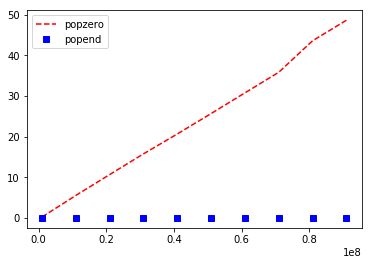

In [41]:
plt.plot(x_ax, pzs,'r--', x_ax, pts, 'bs')
plt.legend(['popzero', 'popend'])

### 2.7 Dictionaries

우리가 알아볼 두 번째 파이썬 자료구조 형태는 dictionary이다. 후에 dictionary를 만드는 여러 방법들을 알아볼텐데, 우선 여기서는 시간복잡도 관점에서만 탐구해보고자 한다.  
자료구조에서 값을 가져오는 것이나 할당하는 것은 리스트와 동일하게(list[i]) $O(1)$의 시간복잡도를 갖는다.  
경우에 따라서 get item, set item, contains(in)의 경우 $O(n)$의 시간복잡도를 갖는 경우도 있는데, 이 경우에 대해서는 나중 챕터에서 알아볼 것이다.

<img src='../images/big-o of python dictionary methods.png', width='600'>
<center>
    <figcaption>table 2. 'big-o of python dictionary methos'</figcaption>
</center>

이제 동일한 task를 list와 dictionary를 이용하여 수행한 후 수행 시간을 비교해보겠다. list에서 contains를 확인하는 것은 $O(n)$의 시간복잡도를, dictionary에서 contains를 확인하는 것은 $O(1)$의 시간복잡도를 갖는다는 것을 간단한 실험을 통해 확인해보고자 한다.

In [44]:
import random

In [47]:
list_times = list()
dict_times = list()
x_ax = range(10000,1000001,20000)
for i in x_ax :
    t = timeit.Timer("random.randrange(%d) in x"%i,
                     "from __main__ import random,x")
    x = list(range(i))
    list_time = t.timeit(number=1000)
    x = {j:None for j in range(i)}
    dict_time = t.timeit(number=1000)
    list_times.append(list_time)
    dict_times.append(dict_time)

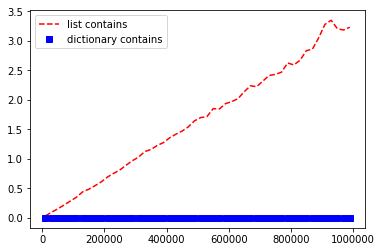

In [48]:
plt.plot(x_ax, list_times, 'r--', x_ax, dict_times, 'bs')
plt.legend(['list contains', 'dictionary contains'])

### 2.8 Summary

* 알고리즘 분석은 알고리즘과는 독립적으로 구현되는 알고리즘 측정 방법이다.
* Big-O 시간복잡도는 문제의 크기를 측정하는 중요한 metric이다.

#### References
- figure1, 2, 3, 4 : https://ko.khanacademy.org/computing/computer-science/algorithms/asymptotic-notation/a/asymptotic-notation
- table 1 : http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/Lists.html
- table 2 : http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/Dictionaries.html